In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10,cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Flatten,Dropout,Conv2D,MaxPool2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


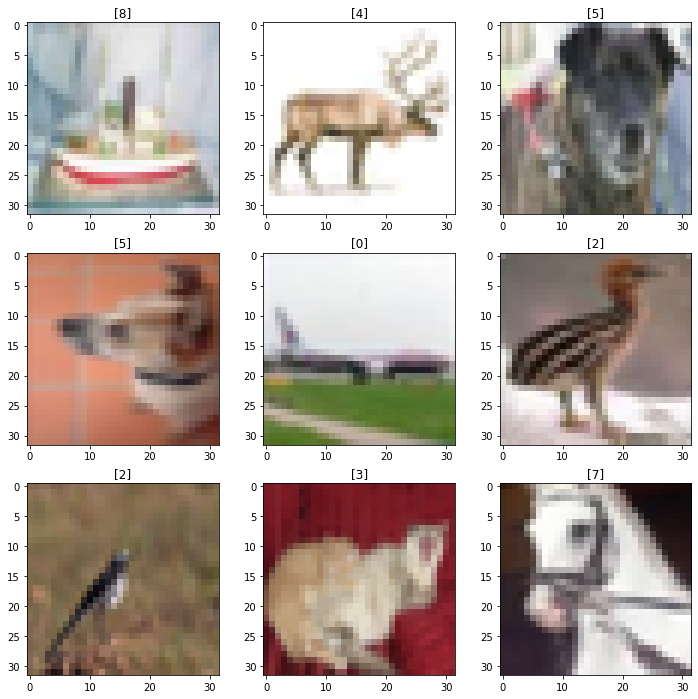

In [5]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

## Data Preprocessing

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
num_classes = y_train.max()+1 #10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
## model building

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense,MaxPooling2D
from tensorflow.keras import optimizers

In [11]:
model = None
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 kernel_initializer='he_normal'))
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
391/391 [==============================] - 37s 11ms/step - loss: 1.6454 - accuracy: 0.4077
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 1.0661 - accuracy: 0.6316
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 0.8929 - accuracy: 0.6943
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 0.8041 - accuracy: 0.7254
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.7209 - accuracy: 0.7548


In [14]:
prediction_score = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.881336510181427, 0.7008000016212463]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
### SGD
model = None
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-64
model.add(Conv2D(64, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [ ]:
## sgd optimiser with different learning rates
l_rate = [0.0001,0.001,0.01,0.1,1,10]
for lr in range(len(l_rate)):
   sgd = optimizers.SGD(lr=l_rate[lr])
   model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 2.2906 - accuracy: 0.1305
with learning rate 0.0001 
loss : 2.2905731201171875
Accuracy : 0.13050000369548798
313/313 [==============================] - 1s 4ms/step - loss: 2.0754 - accuracy: 0.2769
with learning rate 0.001 
loss : 2.0753796100616455
Accuracy : 0.2768999934196472
313/313 [==============================] - 1s 4ms/step - loss: 1.6163 - accuracy: 0.4337
with learning rate 0.01 
loss : 1.6163021326065063
Accuracy : 0.43369999527931213
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1002
with learning rate 0.1 
loss : 2.3026022911071777
Accuracy : 0.10019999742507935
313/313 [==============================] - 1s 4ms/step - loss: 2.3035 - accuracy: 0.1000
with learning rate 1 
loss : 2.303457498550415
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3986 - accuracy: 0.1000
with learning rate 10 
loss : 2.39860200881958
Accuracy : 0

In [ ]:
## Adam optimiser with different learning rates
l_rate = [0.00001,0.0001,0.001,0.01,0.1,]
for lr in range(len(l_rate)):
   adam = optimizers.Adam(lr=l_rate[lr])
   model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 2.3956 - accuracy: 0.1000
with learning rate 1e-05 
loss : 2.395561933517456
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3690 - accuracy: 0.1000
with learning rate 0.0001 
loss : 2.3689818382263184
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3031 - accuracy: 0.1000
with learning rate 0.001 
loss : 2.3030993938446045
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.1000
with learning rate 0.01 
loss : 2.3028905391693115
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3068 - accuracy: 0.1000
with learning rate 0.1 
loss : 2.306807041168213
Accuracy : 0.10000000149011612


In [ ]:
# adding dropout 

In [ ]:
model = None
model = Sequential()
#model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
model.add(Dropout(0.25))
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(Dropout(0.25))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 8s 26ms/step - loss: 2.1347 - accuracy: 0.2178 - val_loss: 1.9506 - val_accuracy: 0.3117
Epoch 2/10
274/274 [==============================] - 6s 23ms/step - loss: 1.8640 - accuracy: 0.3454 - val_loss: 1.8449 - val_accuracy: 0.3797
Epoch 3/10
274/274 [==============================] - 6s 23ms/step - loss: 1.7667 - accuracy: 0.3837 - val_loss: 1.8192 - val_accuracy: 0.3660
Epoch 4/10
274/274 [==============================] - 6s 24ms/step - loss: 1.6914 - accuracy: 0.4093 - val_loss: 1.7159 - val_accuracy: 0.4288
Epoch 5/10
274/274 [==============================] - 6s 24ms/step - loss: 1.6413 - accuracy: 0.4249 - val_loss: 1.6807 - val_accuracy: 0.4290
Epoch 6/10
274/274 [==============================] - 6s 24ms/step - loss: 1.5868 - accuracy: 0.4421 - val_loss: 1.7053 - val_accuracy: 0.4145
Epoch 7/10
274/274 [==============================] - 6s 24ms/step - loss: 1.5342 - accuracy: 0.4604 - val_loss: 1.5913 - val_accuracy: 0.4300

In [ ]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4744 - accuracy: 0.4943


In [ ]:
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

Loss : 1.4744417667388916
Accuracy : 0.4943000078201294


In [ ]:
##2 Batch normalization

In [ ]:
model = None
model = Sequential()
#model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
model.add(BatchNormalization())
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 7s 23ms/step - loss: 1.8938 - accuracy: 0.3932 - val_loss: 2.3273 - val_accuracy: 0.2661
Epoch 2/10
274/274 [==============================] - 6s 22ms/step - loss: 1.1772 - accuracy: 0.5928 - val_loss: 1.3685 - val_accuracy: 0.5201
Epoch 3/10
274/274 [==============================] - 6s 22ms/step - loss: 0.9803 - accuracy: 0.6610 - val_loss: 1.2599 - val_accuracy: 0.5820
Epoch 4/10
274/274 [==============================] - 6s 22ms/step - loss: 0.8654 - accuracy: 0.7025 - val_loss: 1.2519 - val_accuracy: 0.5921
Epoch 5/10
274/274 [==============================] - 6s 22ms/step - loss: 0.7663 - accuracy: 0.7353 - val_loss: 1.6082 - val_accuracy: 0.5159
Epoch 6/10
274/274 [==============================] - 6s 22ms/step - loss: 0.7074 - accuracy: 0.7569 - val_loss: 1.2741 - val_accuracy: 0.5903
Epoch 7/10
274/274 [==============================] - 6s 22ms/step - loss: 0.6398 - accuracy: 0.7801 - val_loss: 1.2105 - val_accuracy: 0.6091

In [ ]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 1.2685 - accuracy: 0.5987
Loss : 1.2685284614562988
Accuracy : 0.5986999869346619


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
##3 L2 regularization
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 15s 51ms/step - loss: 3.2306 - accuracy: 0.2050 - val_loss: 2.8651 - val_accuracy: 0.3362
Epoch 2/10
274/274 [==============================] - 13s 49ms/step - loss: 2.7965 - accuracy: 0.3540 - val_loss: 2.7996 - val_accuracy: 0.3187
Epoch 3/10
274/274 [==============================] - 13s 49ms/step - loss: 2.5988 - accuracy: 0.3899 - val_loss: 2.4843 - val_accuracy: 0.4051
Epoch 4/10
274/274 [==============================] - 13s 49ms/step - loss: 2.4581 - accuracy: 0.4162 - val_loss: 2.4365 - val_accuracy: 0.3952
Epoch 5/10
274/274 [==============================] - 13s 49ms/step - loss: 2.3186 - accuracy: 0.4413 - val_loss: 2.2774 - val_accuracy: 0.4334
Epoch 6/10
274/274 [==============================] - 13s 49ms/step - loss: 2.2288 - accuracy: 0.4454 - val_loss: 2.1943 - val_accuracy: 0.4418
Epoch 7/10
274/274 [==============================] - 13s 49ms/step - loss: 2.1453 - accuracy: 0.4560 - val_loss: 2.1987 - val_accuracy:

In [ ]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 2s 7ms/step - loss: 1.8997 - accuracy: 0.4777
Loss : 1.899735689163208
Accuracy : 0.47769999504089355


In [ ]:
##4 
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 18s 63ms/step - loss: 3.6834 - accuracy: 0.3309 - val_loss: 3.6169 - val_accuracy: 0.2158
Epoch 2/10
274/274 [==============================] - 17s 61ms/step - loss: 2.4271 - accuracy: 0.5095 - val_loss: 2.4491 - val_accuracy: 0.4505
Epoch 3/10
274/274 [==============================] - 17s 61ms/step - loss: 2.0463 - accuracy: 0.5740 - val_loss: 2.0508 - val_accuracy: 0.5493
Epoch 4/10
274/274 [==============================] - 17s 61ms/step - loss: 1.7635 - accuracy: 0.6268 - val_loss: 1.8216 - val_accuracy: 0.5888
Epoch 5/10
274/274 [==============================] - 17s 61ms/step - loss: 1.5865 - accuracy: 0.6535 - val_loss: 1.7576 - val_accuracy: 0.5939
Epoch 6/10
274/274 [==============================] - 17s 61ms/step - loss: 1.4361 - accuracy: 0.6818 - val_loss: 1.6061 - val_accuracy: 0.6146
Epoch 7/10
274/274 [==============================] - 17s 61ms/step - loss: 1.3183 - accuracy: 0.7024 - val_loss: 1.5437 - val_accuracy:

In [ ]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 2s 8ms/step - loss: 1.3993 - accuracy: 0.6345
Loss : 1.3992955684661865
Accuracy : 0.6345000267028809


In [ ]:
##5 
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 27s 93ms/step - loss: 3.6815 - accuracy: 0.2965 - val_loss: 3.7270 - val_accuracy: 0.1442
Epoch 2/10
274/274 [==============================] - 25s 91ms/step - loss: 2.2236 - accuracy: 0.4871 - val_loss: 2.3095 - val_accuracy: 0.4482
Epoch 3/10
274/274 [==============================] - 25s 91ms/step - loss: 1.9862 - accuracy: 0.5451 - val_loss: 2.1178 - val_accuracy: 0.5061
Epoch 4/10
274/274 [==============================] - 25s 91ms/step - loss: 1.8049 - accuracy: 0.5817 - val_loss: 2.0157 - val_accuracy: 0.5187
Epoch 5/10
274/274 [==============================] - 25s 90ms/step - loss: 1.6434 - accuracy: 0.6159 - val_loss: 1.7926 - val_accuracy: 0.5648
Epoch 6/10
274/274 [==============================] - 25s 91ms/step - loss: 1.4802 - accuracy: 0.6551 - val_loss: 1.7736 - val_accuracy: 0.5515
Epoch 7/10
274/274 [==============================] - 25s 91ms/step - loss: 1.3854 - accuracy: 0.6769 - val_loss: 1.7910 - val_accuracy:

In [ ]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 3s 9ms/step - loss: 1.5508 - accuracy: 0.5867
Loss : 1.5507789850234985
Accuracy : 0.5867000222206116


In [ ]:
##6 adding maxpooling layers
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 7s 23ms/step - loss: 3.2067 - accuracy: 0.1707 - val_loss: 3.4134 - val_accuracy: 0.0984
Epoch 2/10
274/274 [==============================] - 6s 21ms/step - loss: 2.7325 - accuracy: 0.2975 - val_loss: 3.2111 - val_accuracy: 0.1521
Epoch 3/10
274/274 [==============================] - 6s 21ms/step - loss: 2.5226 - accuracy: 0.3358 - val_loss: 2.5509 - val_accuracy: 0.2983
Epoch 4/10
274/274 [==============================] - 6s 21ms/step - loss: 2.3710 - accuracy: 0.3702 - val_loss: 2.3336 - val_accuracy: 0.3427
Epoch 5/10
274/274 [==============================] - 6s 21ms/step - loss: 2.2452 - accuracy: 0.3947 - val_loss: 2.3314 - val_accuracy: 0.3547
Epoch 6/10
274/274 [==============================] - 6s 21ms/step - loss: 2.1241 - accuracy: 0.4166 - val_loss: 2.1783 - val_accuracy: 0.3826
Epoch 7/10
274/274 [==============================] - 6s 21ms/step - loss: 2.0425 - accuracy: 0.4246 - val_loss: 2.0392 - val_accuracy: 0.4192

In [ ]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 2s 5ms/step - loss: 2.0079 - accuracy: 0.3898
Loss : 2.007906913757324
Accuracy : 0.3898000121116638


In [ ]:
#!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.6MB/s 


In [19]:
### VGGNET

from tensorflow.keras.applications import VGG16,VGG19

In [20]:
#Build the model

'The first base model used is VGG19. The pretrained weights from the imagenet challenge are used'
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80142336/80134624 [==============================] - 1s 0us/step


In [21]:
model_1= Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())

In [22]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [24]:
#Check final model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [25]:
model_1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
history = model_1.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/30
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4905 - accuracy: 0.8363
Epoch 2/30
1563/1563 [==============================] - 54s 34ms/step - loss: 0.2921 - accuracy: 0.9011
Epoch 3/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.2210 - accuracy: 0.9265
Epoch 4/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1639 - accuracy: 0.9449
Epoch 5/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1230 - accuracy: 0.9593
Epoch 6/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0948 - accuracy: 0.9691
Epoch 7/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0765 - accuracy: 0.9741
Epoch 8/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0681 - accuracy: 0.9771
Epoch 9/30
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0516 - accuracy: 0.9823
Epoch 10/30
1563/1563 [==============================] - 54s 35m

In [54]:
results = model_1.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 3s 11ms/step - loss: 0.8088 - accuracy: 0.8711
Loss : 0.8088492751121521
Accuracy : 0.8711000084877014


In [ ]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

### Hyper parameter tuning

In [ ]:
#!pip install keras-tuner

In [62]:
import kerastuner as kt

In [68]:
def build_model(hp):  
  model = Sequential([
    Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [69]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [70]:
tuner=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='my_dir',project_name="cnn_cifar_10")

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [84]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Oracle triggered exit


In [85]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8044 - accuracy: 0.3474 - val_loss: 1.5027 - val_accuracy: 0.4724
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3517 - accuracy: 0.5207 - val_loss: 1.3015 - val_accuracy: 0.5415
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2207 - accuracy: 0.5689 - val_loss: 1.2587 - val_accuracy: 0.5601
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1469 - accuracy: 0.5951 - val_loss: 1.1778 - val_accuracy: 0.5867
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0614 - accuracy: 0.6249 - val_loss: 1.1347 - val_accuracy: 0.6081
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9850 - accuracy: 0.6571 - val_loss: 1.1267 - val_accuracy: 0.6088
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9103 - accuracy: 0.6833 - val_loss: 1.0826 - val_accuracy:

In [86]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7568 - accuracy: 0.3675
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3100 - accuracy: 0.5349
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1626 - accuracy: 0.5929
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0654 - accuracy: 0.6311
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9727 - accuracy: 0.6634
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8945 - accuracy: 0.6923
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8403 - accuracy: 0.7094
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7743 - accuracy: 0.7365
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7243 - accuracy: 0.7516
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.664

In [87]:
results = hypermodel.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.9902 - accuracy: 0.6633
Loss : 0.9901741147041321
Accuracy : 0.6632999777793884


______________
___________